In [194]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import joblib

In [195]:
# reading full data
pd.read_csv("Data/bank-full.csv")

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."
...,...
45206,"51;""technician"";""married"";""tertiary"";""no"";825;..."
45207,"71;""retired"";""divorced"";""primary"";""no"";1729;""n..."
45208,"72;""retired"";""married"";""secondary"";""no"";5715;""..."
45209,"57;""blue-collar"";""married"";""secondary"";""no"";66..."


## Loading, aligning and Cleaning Data
the data from the above code was not align well.
so alignment and cleaning of data starts from free

In [196]:
law = pd.read_csv("Data/bank-full.csv", sep=";")
law.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [197]:
law.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [198]:
law.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [199]:
law.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Exploratory Data Analysis

In [200]:
law["y"].value_counts(normalize = True)

y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

Changing month value into numerical values

In [201]:
month_to_nv = {
    "jan": 1,
    "feb": 2,
    "mar": 3,
    "apr": 4,
    "may": 5,
    "jun": 6,
    "jul": 7,
    "aug": 8,
    "sep": 9,
    "oct": 10,
    "nov": 11,
    "dec": 12
}

for df in [law]:
    if "month" in df.columns and df["month"].dtype == "object":
        df["month"] = df["month"].map(month_to_nv)

In [202]:
law

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,11,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,11,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,11,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,11,508,4,-1,0,unknown,no


In [203]:
# Changing Yes and No to 1 and 0 (Where Yes is 1 and No is 0)
yes_no_columns = law.columns[law.isin(["yes", "no"]).any()]
law[yes_no_columns] = law[yes_no_columns].applymap(lambda x: 1 if x == "yes" else (0 if x == "no" else x))

C:\Users\Law\AppData\Local\Temp\ipykernel_19540\83734841.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  law[yes_no_columns] = law[yes_no_columns].applymap(lambda x: 1 if x == "yes" else (0 if x == "no" else x))


In [204]:
law.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,5,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,5,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,5,198,1,-1,0,unknown,0


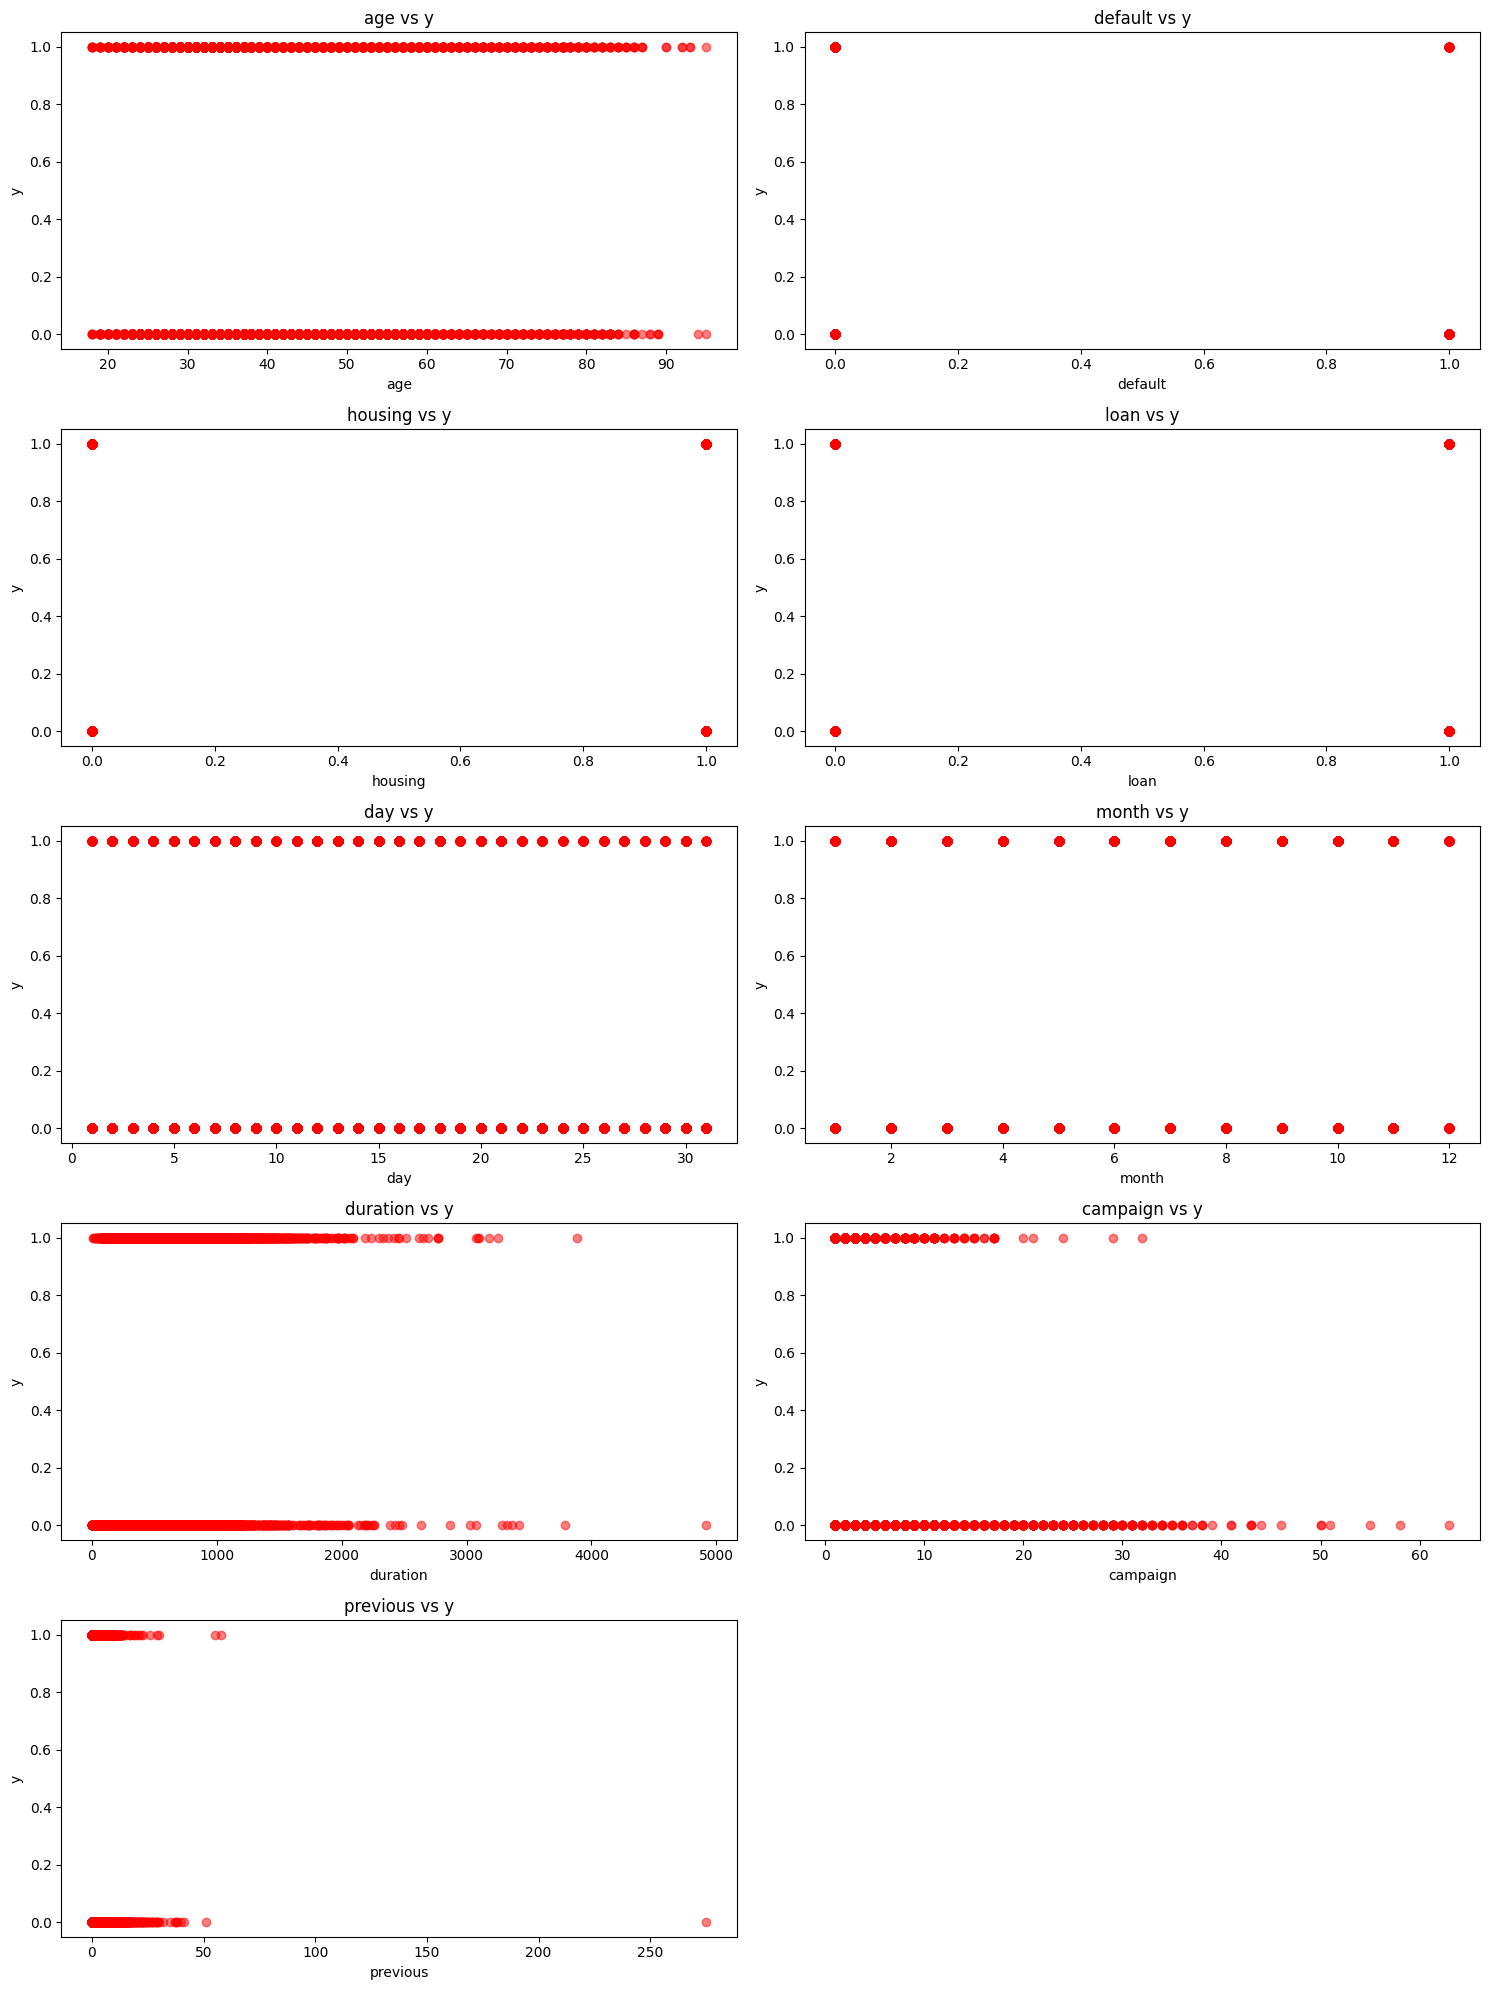

In [205]:
P_values = ["age", "default", "housing", "loan", "day", "month", "duration", "campaign", "previous"]
plt.figure(figsize=(15, 20))
for i, P_values in enumerate(P_values):
    plt.subplot(5, 2, i + 1)
    if law[P_values].dtype == "object":
        sns.stripplot(x = P_values, y="y", data = law, jitter=True, alpha=0.6)
    else:
        plt.scatter(law[P_values], law["y"], alpha = 0.5, color = "red")
        plt.xlabel(P_values)
        plt.ylabel("y")
        plt.title(f"{P_values} vs y")

plt.tight_layout()
plt.show()

Encoding Columns

In [206]:
obj_columns = law.select_dtypes(include = "object").columns
law = pd.get_dummies(law, columns = obj_columns)
law[law.select_dtypes(include = "bool").columns] = law[law.select_dtypes(include = "bool").columns].astype(int)

In [207]:
law.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,...,0,0,1,0,0,1,0,0,0,1


In [208]:
print(law.dtypes)

age                    int64
default                int64
balance                int64
housing                int64
loan                   int64
day                    int64
month                  int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
y                      int64
job_admin.             int32
job_blue-collar        int32
job_entrepreneur       int32
job_housemaid          int32
job_management         int32
job_retired            int32
job_self-employed      int32
job_services           int32
job_student            int32
job_technician         int32
job_unemployed         int32
job_unknown            int32
marital_divorced       int32
marital_married        int32
marital_single         int32
education_primary      int32
education_secondary    int32
education_tertiary     int32
education_unknown      int32
contact_cellular       int32
contact_telephone      int32
contact_unknown        int32
poutcome_failu

Feature Extraction (Numerical and Categorical Extraction)

In [209]:
numerical_feature = []
categorical_feature = []

for column in law.columns:
    if column == "y":
        continue
    elif len(law[column].unique()) <= 10:
        categorical_feature.append(column)
    else:
        numerical_feature.append(column)

In [210]:
law.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,...,0,0,1,0,0,1,0,0,0,1


Cleraing Outliers

In [218]:
no_o_law = law.copy()
for column in numerical_feature:
    IQR = no_o_law[column].quantile(0.75) - no_o_law[column].quantile(0.25)
    lower_bound = no_o_law[column].quantile(0.25) - 1.5 * IQR
    upper_bound = no_o_law[column].quantile(0.75) + 1.5 * IQR
    no_o_law = no_o_law[(no_o_law[column] >= lower_bound) & (no_o_law[column] <= upper_bound)]

In [212]:
law.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,...,0,0,1,0,0,1,0,0,0,1


In [ ]:
X = law.drop("y", axis=1)
y = law["y"]

non_numeric = X.select_dtypes(include="object").columns
print("Non-numeric columns:", non_numeric)


Non-numeric columns: Index([], dtype='object')


In [214]:
X_all = pd.get_dummies(X, drop_first=True)

In [215]:
law.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,...,0,0,1,0,0,1,0,0,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [227]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

c:\Users\Law\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [228]:
model.predict(X_test,)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [229]:
y_test

8088     0
24287    0
8290     0
21415    1
25856    0
        ..
5836     0
25715    0
28774    0
13636    0
29901    0
Name: y, Length: 4522, dtype: int64

In [230]:
model.score(X_test, y_test)

0.8978328173374613

In [231]:

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("\n", Counter(y_test), "\n", Counter(y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      3993
           1       0.63      0.31      0.41       529

    accuracy                           0.90      4522
   macro avg       0.77      0.64      0.68      4522
weighted avg       0.88      0.90      0.88      4522


 Counter({0: 3993, 1: 529}) 
 Counter({0: 4263, 1: 259})


In [232]:
joblib.dump(model, "model.pkl")

['model.pkl']